## Data Cleaning, Validaiton and Feature Engineeirng with Wikipedia Pageview and Stock Price 

In [1]:
import datetime 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import wiki 
import stock
from scipy.stats import norm
import ppscore as pp
import twitterscraper

## Part 1 Data extraction & validation for wikipedia data 

In [2]:
start_date = datetime.date(2015,7,1)
wiki_list = ['Facebook.wiki','Google.wiki','Microsoft.wiki','Amazon (company).wiki','Apple Inc..wiki']
ticker_list = ['FB','GOOGL','MSFT','AMZN','AAPL'] 

### Double click to highlight individual traces in the visulisation

In [3]:
df_wiki_pv = wiki.wiki_extractor()
df_wiki_pv = df_wiki_pv[['Date'] + wiki_list]
df_wiki_pv = df_wiki_pv[df_wiki_pv['Date']>= pd.to_datetime(start_date)]
df_wiki_pv.info()
print(df_wiki_pv['Date'].max())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 1864
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1865 non-null   datetime64[ns]
 1   Facebook.wiki          1865 non-null   int64         
 2   Google.wiki            1865 non-null   int64         
 3   Microsoft.wiki         1865 non-null   int64         
 4   Amazon (company).wiki  1865 non-null   int64         
 5   Apple Inc..wiki        1865 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 102.0 KB
2020-08-07 00:00:00


* As we can see Amazon wiki pedia data has some issue, so we delte this feature since we do not lack predictors 

In [4]:
df_wiki_pv = df_wiki_pv.drop(columns = ['Amazon (company).wiki'])

In [5]:
df_wiki_pv.head()

,Date,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki
0,2015-07-01,50697,48461,7479,11551
1,2015-07-02,99060,47677,7671,12192
2,2015-07-03,45756,44945,6418,10946
3,2015-07-04,42347,40774,5829,9718
4,2015-07-05,46149,42162,6086,10826


In [6]:
df_wiki_pv.tail()

,Date,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki
1860,2020-08-03,17430,26244,11438,12808
1861,2020-08-04,16527,18095,9991,13311
1862,2020-08-05,16654,19028,8099,13297
1863,2020-08-06,14263,16961,7288,12109
1864,2020-08-07,13744,15969,7916,12518


In [7]:
df_wiki_pv.corr()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki
Facebook.wiki,1.000000,0.463351,0.106756,0.094944
Google.wiki,0.463351,1.000000,0.092504,0.137132
Microsoft.wiki,0.106756,0.092504,1.000000,0.326409
Apple Inc..wiki,0.094944,0.137132,0.326409,1.000000


In [8]:
num_days =  datetime.date(2020,8,7) - start_date
print(num_days.days + 1)
if num_days.days + 1 == df_wiki_pv.shape[0]: 
    print('Num_days Checked for wiki PV data: sparisty = 0')

1865
Num_days Checked for wiki PV data: sparisty = 0


## Part 2 - Data extraction for the stock price data 

### Double click to highlight individual traces in the visulisation

In [9]:
df_stock = stock.stock_extractor_day(start_date)

[*********************100%***********************]  5 of 5 completed


In [10]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1321 entries, 2015-06-30 to 2020-09-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1321 non-null   float64
 1   AMZN    1321 non-null   float64
 2   FB      1321 non-null   float64
 3   GOOGL   1321 non-null   float64
 4   MSFT    1321 non-null   float64
dtypes: float64(5)
memory usage: 61.9 KB


In [11]:
df_stock.head()

,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,
2015-06-30,28.847332,434.089996,85.769997,540.039978,39.860466
2015-07-01,29.116421,437.390015,86.910004,543.299988,40.131306
2015-07-02,29.079618,437.709991,87.290001,547.340027,40.086163
2015-07-06,28.978426,436.040009,87.550003,545.619995,40.077141
2015-07-07,28.907131,436.720001,87.220001,550.030029,39.995888


### Noticed high correlation between tech

<AxesSubplot:>

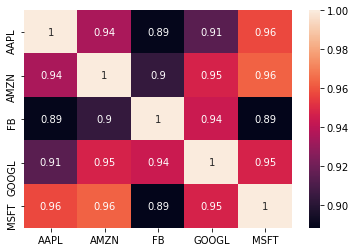

In [12]:
sns.heatmap(df_stock.corr(),annot=True)

## Part 3 - Feature Engineeirng 

1. We need to remove amaon wiki pedia first as we have found that data before Sep 2017 are very low, being potential data issue, removal because we do not lack predictors 

In [13]:
df_wiki_pv = df_wiki_pv.set_index('Date')
df_wiki_pv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1865 entries, 2015-07-01 to 2020-08-07
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Facebook.wiki    1865 non-null   int64
 1   Google.wiki      1865 non-null   int64
 2   Microsoft.wiki   1865 non-null   int64
 3   Apple Inc..wiki  1865 non-null   int64
dtypes: int64(4)
memory usage: 72.9 KB


In [14]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1321 entries, 2015-06-30 to 2020-09-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1321 non-null   float64
 1   AMZN    1321 non-null   float64
 2   FB      1321 non-null   float64
 3   GOOGL   1321 non-null   float64
 4   MSFT    1321 non-null   float64
dtypes: float64(5)
memory usage: 61.9 KB


In [15]:
df = df_wiki_pv.merge(df_stock, left_index = True, right_index = True, how = 'inner' )
df.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,,,,,
2015-07-01,50697,48461,7479,11551,29.116421,437.390015,86.910004,543.299988,40.131306
2015-07-02,99060,47677,7671,12192,29.079618,437.709991,87.290001,547.340027,40.086163
2015-07-06,46947,46533,7491,11711,28.978426,436.040009,87.550003,545.619995,40.077141
2015-07-07,45924,47695,7518,13505,28.907131,436.720001,87.220001,550.030029,39.995888
2015-07-08,45403,45521,10472,14554,28.189571,429.700012,85.650002,541.700012,39.941715


In [16]:
df.tail()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,,,,,
2020-08-03,17430,26244,11438,12808,108.741440,3111.889893,251.960007,1482.760010,216.017807
2020-08-04,16527,18095,9991,13311,109.467628,3138.830078,249.830002,1473.300049,212.775650
2020-08-05,16654,19028,8099,13297,109.864410,3205.030029,249.119995,1479.089966,212.426498
2020-08-06,14263,16961,7288,12109,113.697502,3225.000000,265.279999,1504.949951,215.828278
2020-08-07,13744,15969,7916,12518,111.112503,3167.459961,268.440002,1498.369995,211.967606


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Facebook.wiki    1286 non-null   int64  
 1   Google.wiki      1286 non-null   int64  
 2   Microsoft.wiki   1286 non-null   int64  
 3   Apple Inc..wiki  1286 non-null   int64  
 4   AAPL             1286 non-null   float64
 5   AMZN             1286 non-null   float64
 6   FB               1286 non-null   float64
 7   GOOGL            1286 non-null   float64
 8   MSFT             1286 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 100.5 KB


## We have noticed some missing data after the merge 

1. Source 1: financial data not available on weekend 

2. Soucr  2: data issues due to using yahoo finance

So we have identifed about 59 miss obeservations amoung 5 years about from Yahoo Finance 

In [18]:
source1 = 52*5*2
print('Souce 1 accounts for about {0} out of {1} missmatch'.format(source1, df_wiki_pv.shape[0] - df.shape[0]))
print('Souce 2 accounts for about {0} out of {1} missmatch'.format(df_wiki_pv.shape[0] - df.shape[0] - source1, df_wiki_pv.shape[0] - df.shape[0]))

Souce 1 accounts for about 520 out of 579 missmatch
Souce 2 accounts for about 59 out of 579 missmatch


* Log transformation of wiki features 

In [19]:
wiki_feature = [x for x in list(df.columns) if 'wiki' in x]

In [20]:
wiki_feature

['Facebook.wiki', 'Google.wiki', 'Microsoft.wiki', 'Apple Inc..wiki']

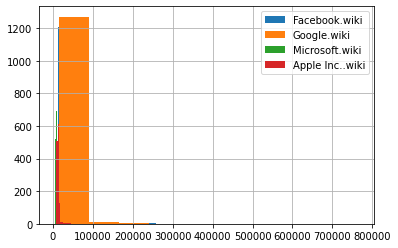

In [21]:
for f in wiki_feature: 
    df[f].hist(legend = True)

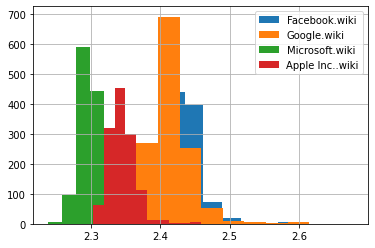

In [22]:
for f in wiki_feature: 
    df[f] = np.log(df[f]+1)
    np.log(df[f]+1).hist(legend = True)

* Gneretae return features for individual stock 

In [23]:
for tickers in ticker_list: 
    df[tickers + '_return'] = df[tickers].pct_change()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Facebook.wiki    1286 non-null   float64
 1   Google.wiki      1286 non-null   float64
 2   Microsoft.wiki   1286 non-null   float64
 3   Apple Inc..wiki  1286 non-null   float64
 4   AAPL             1286 non-null   float64
 5   AMZN             1286 non-null   float64
 6   FB               1286 non-null   float64
 7   GOOGL            1286 non-null   float64
 8   MSFT             1286 non-null   float64
 9   FB_return        1285 non-null   float64
 10  GOOGL_return     1285 non-null   float64
 11  MSFT_return      1285 non-null   float64
 12  AMZN_return      1285 non-null   float64
 13  AAPL_return      1285 non-null   float64
dtypes: float64(14)
memory usage: 150.7 KB


* Gneretae t-1 to t-3 features for wikiepedia pageview 

In [25]:
for tickers in wiki_feature:
    n = 1 
    while n <= 3: 
        df[tickers + '_t-' + str(n)] = df[tickers].shift(n)
        n += 1 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Facebook.wiki        1286 non-null   float64
 1   Google.wiki          1286 non-null   float64
 2   Microsoft.wiki       1286 non-null   float64
 3   Apple Inc..wiki      1286 non-null   float64
 4   AAPL                 1286 non-null   float64
 5   AMZN                 1286 non-null   float64
 6   FB                   1286 non-null   float64
 7   GOOGL                1286 non-null   float64
 8   MSFT                 1286 non-null   float64
 9   FB_return            1285 non-null   float64
 10  GOOGL_return         1285 non-null   float64
 11  MSFT_return          1285 non-null   float64
 12  AMZN_return          1285 non-null   float64
 13  AAPL_return          1285 non-null   float64
 14  Facebook.wiki_t-1    1285 non-null   float64
 15  Facebook.wiki_t-2   

* Generate t-1 to t-3 features for stock price 

In [26]:
for tickers in ticker_list: 
    n = 1
    while n <= 3: 
        df[tickers + '_return' + '_t-' + str(n)] = df[tickers + '_return'].shift(n)
        n += 1

In [27]:
df[['GOOGL_return_t-3','GOOGL_return_t-2','GOOGL_return_t-1','GOOGL_return']].head()

,GOOGL_return_t-3,GOOGL_return_t-2,GOOGL_return_t-1,GOOGL_return
Date,,,,
2015-07-01,NaN,NaN,NaN,NaN
2015-07-02,NaN,NaN,NaN,0.007436
2015-07-06,NaN,NaN,0.007436,-0.003143
2015-07-07,NaN,0.007436,-0.003143,0.008083
2015-07-08,0.007436,-0.003143,0.008083,-0.015145


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Facebook.wiki        1286 non-null   float64
 1   Google.wiki          1286 non-null   float64
 2   Microsoft.wiki       1286 non-null   float64
 3   Apple Inc..wiki      1286 non-null   float64
 4   AAPL                 1286 non-null   float64
 5   AMZN                 1286 non-null   float64
 6   FB                   1286 non-null   float64
 7   GOOGL                1286 non-null   float64
 8   MSFT                 1286 non-null   float64
 9   FB_return            1285 non-null   float64
 10  GOOGL_return         1285 non-null   float64
 11  MSFT_return          1285 non-null   float64
 12  AMZN_return          1285 non-null   float64
 13  AAPL_return          1285 non-null   float64
 14  Facebook.wiki_t-1    1285 non-null   float64
 15  Facebook.wiki_t-2   

* Generate the t-n - t-(n+1) features for Wikipedia pageview 

In [29]:
wiki_t_n =  [x for x  in  list(df.columns) if  'wiki' in x and '-' in x]
#print(wiki_t_n)
for i in range(len(wiki_t_n)): 
    number = wiki_t_n[i][-1]
    #print(str(number+1))
    df[wiki_t_n[i] + '_t-' + str(int(number)+1)] = df[wiki_t_n[i]].diff()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facebook.wiki            1286 non-null   float64
 1   Google.wiki              1286 non-null   float64
 2   Microsoft.wiki           1286 non-null   float64
 3   Apple Inc..wiki          1286 non-null   float64
 4   AAPL                     1286 non-null   float64
 5   AMZN                     1286 non-null   float64
 6   FB                       1286 non-null   float64
 7   GOOGL                    1286 non-null   float64
 8   MSFT                     1286 non-null   float64
 9   FB_return                1285 non-null   float64
 10  GOOGL_return             1285 non-null   float64
 11  MSFT_return              1285 non-null   float64
 12  AMZN_return              1285 non-null   float64
 13  AAPL_return              1285 non-null   float64
 14  Facebo

In [31]:
df[['Apple Inc..wiki','Apple Inc..wiki_t-1','Apple Inc..wiki_t-2','Apple Inc..wiki_t-3','Apple Inc..wiki_t-1_t-2','Apple Inc..wiki_t-2_t-3']].head()

,Apple Inc..wiki,Apple Inc..wiki_t-1,Apple Inc..wiki_t-2,Apple Inc..wiki_t-3,Apple Inc..wiki_t-1_t-2,Apple Inc..wiki_t-2_t-3
Date,,,,,,
2015-07-01,9.354614,NaN,NaN,NaN,NaN,NaN
2015-07-02,9.408617,9.354614,NaN,NaN,NaN,NaN
2015-07-06,9.368369,9.408617,9.354614,NaN,0.054003,NaN
2015-07-07,9.510889,9.368369,9.408617,9.354614,-0.040248,0.054003
2015-07-08,9.585690,9.510889,9.368369,9.408617,0.142520,-0.040248


In [32]:
df = df.dropna()

In [69]:
df.to_csv('financial_wiki_2017_07_08.csv')